# Fourier transforms (a first look)

### Example:
1. Consider the signal:

$f(t)=\sin(0.8\,t) + \cos(2.5\,t)$,


which consists of the linear combination of two functions:

$f_1(t) = \sin(\omega_1\,t) = \sin(2\,\pi\,\nu_1\,t) = \sin(0.8\,t)$


$f_2(t) = \cos(\omega_2\,t) = \cos(2\,\pi\,\nu_2\,t) = \cos(2.5\,t)$

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def frequency(w):
    return w/(2*np.pi)

In [3]:
w_1 = 0.8
w_2 = 2.5

In [4]:
nu_1 = frequency(w_1)
nu_2 = frequency(w_2)

print(nu_1, nu_2)

0.12732395447351627 0.3978873577297384


# Plot of the original functin:

In [6]:
def function(t):
    return np.sin(w_1*t) + np.cos(w_2*t)

<Figure size 1000x600 with 0 Axes>

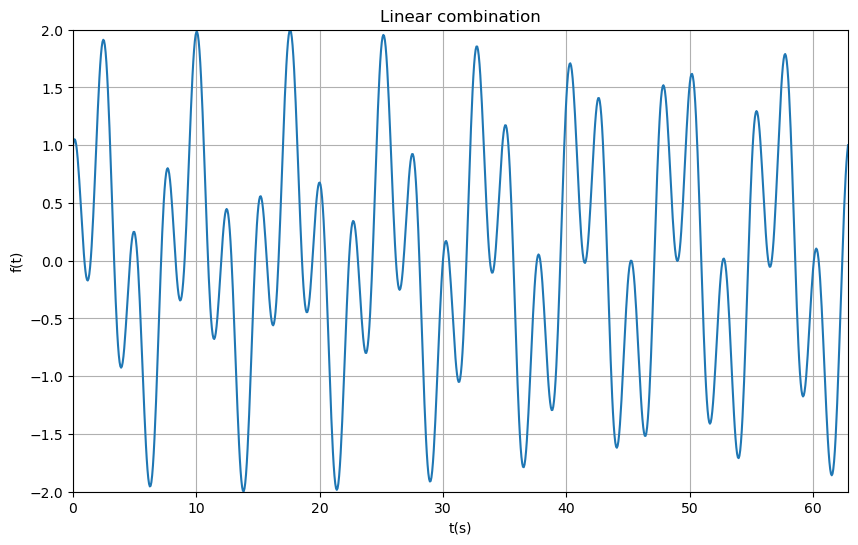

In [7]:
# t_axis for plotting
t = np.linspace(0, 20*np.pi, 1000, endpoint=True)

#define range for x and y
axes_range = [0, 20*np.pi, -2, 2]

#plotting
plt.figure(figsize = (10, 6))
plt.plot(t, function(t))
plt.title('Linear combination');
plt.xlabel('t(s)')
plt.ylabel('f(t)')
plt.axis(axes_range)
plt.grid()
plt.show()


### Fourier analysis:

https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html

In [11]:
F = np.fft.fft(function(t), t.size)

F_norm = np.abs(F)


In [14]:
print(t.size)
print(F_norm.size)

1000
1000


In [15]:
freqs = np.fft.fftfreq(t.size, 20*np.pi/1000)

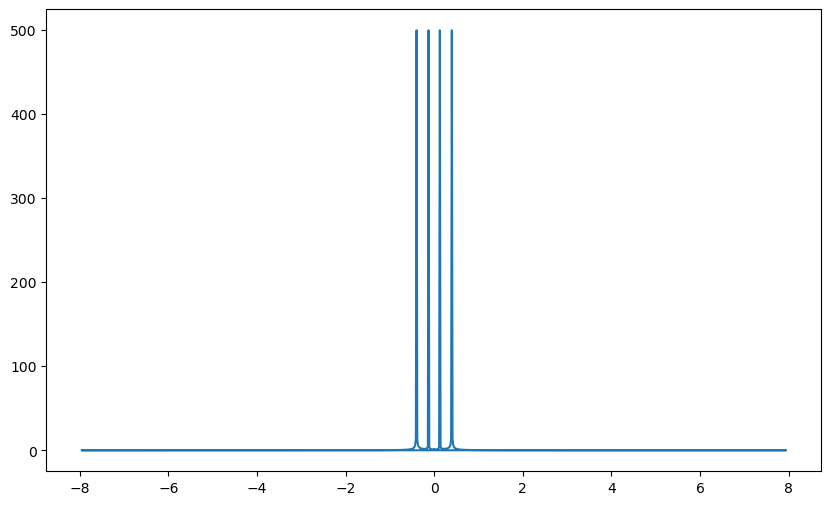

In [16]:
plt.figure(figsize=(10,6))

plt.plot(freqs, F_norm)

plt.show()

<Figure size 1000x600 with 0 Axes>

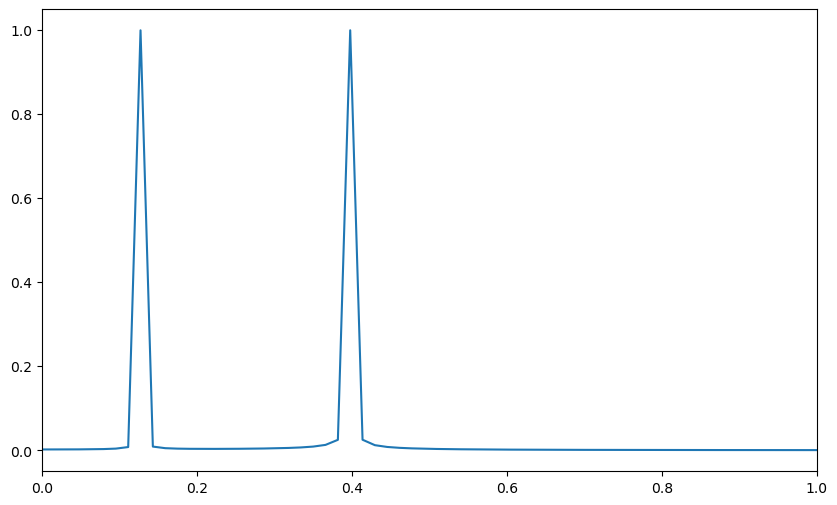

In [18]:
plt.figure(figsize=(10,6))

plt.plot(freqs[0:freqs.size//2], (2/F_norm.size)*F_norm[0:F_norm.size//2])

plt.xlim(0,1)
plt.show()

In [19]:
print(nu_1, nu_2)

0.12732395447351627 0.3978873577297384


In [20]:
from scipy.signal import find_peaks

In [23]:
amp_Fm = (2/F_norm.size)*F_norm[0:F_norm.size//2]

peaks, _ = find_peaks(amp_Fm, height=0)

print(peaks)

[ 8 25]


In [24]:
peak_freq1 = freqs[peaks[0]]
peak_freq2 = freqs[peaks[1]]

print(peak_freq1, peak_freq2)

0.12732395447351627 0.3978873577297383
